# Exercise 10- Part1

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Define the path to the new dataset 
project_folder_path = r"C:\Users\marci\15-07-2024Instacart Basket Analysis\02 Data"

In [5]:
df_Orders_products_all= pd.read_pickle(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\02 Data\Prepared Data\Orders_products_all.pkl")


In [7]:
df_Orders_products_all = df_Orders_products_all.drop(columns=['Unnamed: 0'])

In [9]:
df_Orders_products_all.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,existing_merge,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,num_dependents,family_status,income
0,2539329,1,1,2,8,0.0,196,1,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,0.0,14084,2,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,0.0,12427,3,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,0.0,26088,4,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,0.0,26405,5,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [11]:
df_Orders_products_all.describe()#

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,age,num_dependents,income
count,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07,3.243303e+07
mean,1.710748e+06,1.029375e+05,1.714200e+01,2.738815e+00,1.342500e+01,1.039270e+01,2.557749e+04,8.351107e+00,5.896915e-01,7.121488e+01,9.922101e+00,7.795737e+00,3.305231e+01,4.946523e+01,1.501877e+00,9.943537e+04
std,9.872998e+05,5.946650e+04,1.753495e+01,2.090050e+00,4.246349e+00,8.917724e+00,1.409625e+04,7.126631e+00,4.918897e-01,3.820386e+01,6.281257e+00,4.242884e+00,2.515455e+01,1.848555e+01,1.118870e+00,4.305491e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559442e+05,5.142000e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,3.300000e+01,1.000000e+00,6.699800e+04
50%,1.711049e+06,1.026130e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,4.900000e+01,2.000000e+00,9.661200e+04
75%,2.565511e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,6.500000e+01,3.000000e+00,1.279080e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,8.100000e+01,3.000000e+00,5.939010e+05


# STEP 2: Security implications

In [13]:
# Drop PII columns
df_Orders_products_all = df_Orders_products_all.drop(columns=['first_name', 'last_name'])

# Verify the columns are dropped
print(df_Orders_products_all.columns)

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'existing_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'merge_flag', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'num_dependents', 'family_status', 'income'],
      dtype='object')


In [17]:
df_Orders_products_all.shape

(32433030, 28)

In [19]:
# Check for missing values in the 'spending_flag' column
missing_values = df_Orders_products_all['spending_flag'].isnull().sum()

print(f"Number of missing values in 'spending_flag': {missing_values}")

Number of missing values in 'spending_flag': 0


In [21]:
# Check unique values in the 'state' column
unique_states = df_Orders_products_all['state'].unique()

print("Unique states in the data:")
print(unique_states)

Unique states in the data:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


# Step 3: Create the Region Column

In [23]:
# Define the mapping for full state names to regions, including District of Columbia
state_to_region_full = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'New Hampshire': 'Northeast', 
    'Rhode Island': 'Northeast', 'Vermont': 'Northeast', 'New Jersey': 'Northeast', 'New York': 'Northeast', 
    'Pennsylvania': 'Northeast', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest', 
    'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest', 
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Delaware': 'South', 'Florida': 'South', 
    'Georgia': 'South', 'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South', 
    'West Virginia': 'South', 'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South', 'Tennessee': 'South', 
    'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arizona': 'West', 'Colorado': 'West', 
    'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West', 
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West',
    'District of Columbia': 'South'
}

# Map the full state names to regions
df_Orders_products_all['Region'] = df_Orders_products_all['state'].map(state_to_region_full)

# Check for missing values in the 'Region' column again
missing_values_region = df_Orders_products_all['Region'].isnull().sum()
print(f"Number of missing values in 'Region': {missing_values_region}")

Number of missing values in 'Region': 0


In [25]:
df_Orders_products_all['Region'].value_counts(dropna=False)

Region
South        10801195
West          8300141
Midwest       7603550
Northeast     5728144
Name: count, dtype: int64

# 3.B Creating crosstab 

In [27]:
# Create a crosstab of Region and spending_flag
crosstab = pd.crosstab(df_Orders_products_all['Region'], df_Orders_products_all['spending_flag'], dropna=False)

# Print the crosstab to see the distribution
print(crosstab)

spending_flag  High spender  Low spender
Region                                  
Midwest              156125      7447425
Northeast            108342      5619802
South                210180     10591015
West                 160807      8139334


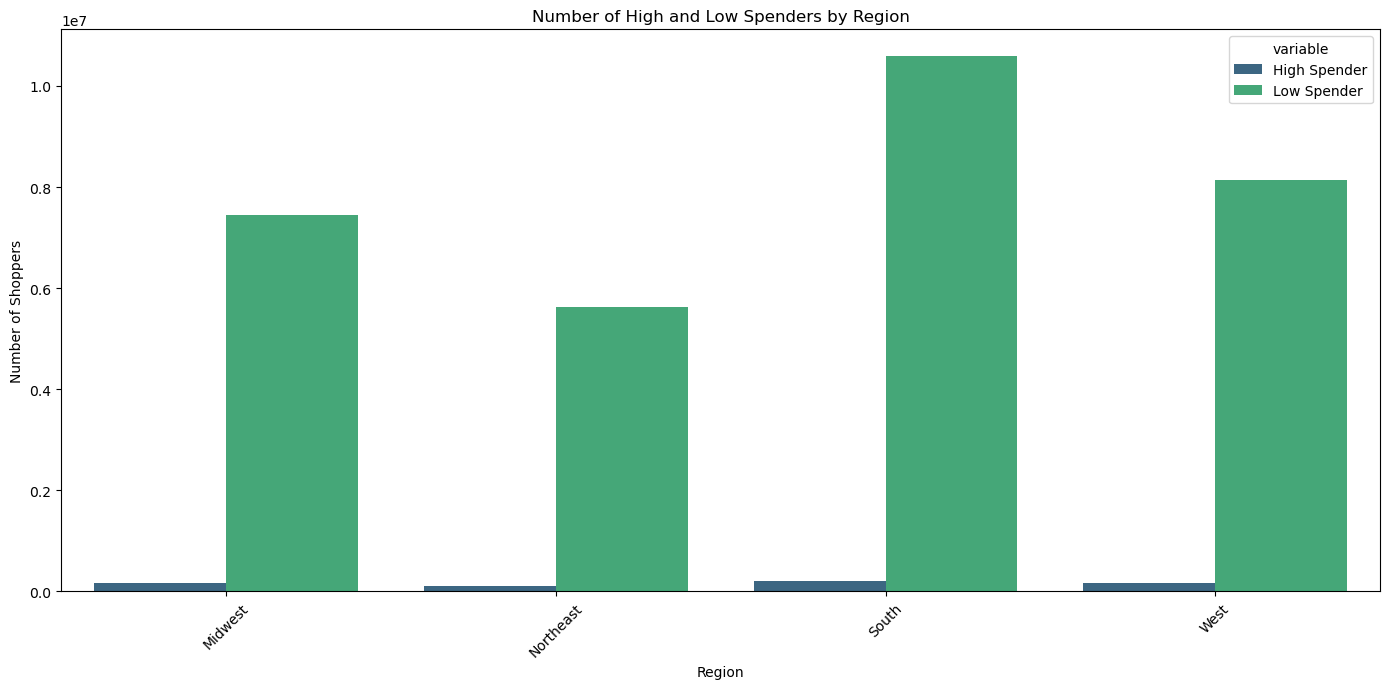

In [21]:
# aggregation step
region_spending = df_Orders_products_all.groupby(['Region', 'spending_flag']).size().unstack(fill_value=0).reset_index()

# Rename columns for clarity
region_spending.columns = ['Region', 'High Spender', 'Low Spender']

# Calculate the total shoppers per region
region_spending['Total Shoppers'] = region_spending['High Spender'] + region_spending['Low Spender']

# Create the bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=region_spending.melt(id_vars='Region', value_vars=['High Spender', 'Low Spender']), 
            x='Region', y='value', hue='variable', palette='viridis')

# Customize the plot
plt.title('Number of High and Low Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Number of Shoppers')
plt.xticks(rotation=45)
plt.tight_layout()

# Define the directory and file path for saving the plot
directory = r'C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations'
file_path = os.path.join(directory, 'spending_by_region.png')

# Ensure the directory exists
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the plot
plt.savefig(file_path)
plt.show()

# ANALYSIS: 
1.Total Shoppers by Region: (Total shoppers=High spender+Low spender)
    The South has the largest customer base, followed by the West, Midwest, and Northeast.
2. Proportion of High Spenders by Region: (Proportion of High Spenders= Total shoppers/High spender
   The Midwest has the highest proportion of high spenders, although all regions have relatively similar proportions, around 1.9-2.0%.

# STEP 4: Create an exclusion flag for low-activity customers --> df_filtered

In [29]:
# Calculate the number of orders per customer
order_counts = df_Orders_products_all.groupby('user_id')['order_number'].max()

# Identify low-activity customers (less than 5 orders)
low_activity_users = order_counts[order_counts < 5].index

# Filter the Data
# Exclude low-activity customers using their user_ids
df_filtered = df_Orders_products_all[~df_Orders_products_all['user_id'].isin(low_activity_users)]



In [31]:
# Exporting df_ords_prods_merge. Now we are going to work with df_filtered, which contains only relavant data, excluding low-activity customers
df_Orders_products_all.to_pickle(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\02 Data\Prepared Data\df_Orders_products_all.pkl")

In [407]:
del filtered_data


# STEP 5: Customer profiling 

In [37]:
# Define the age segments
def age_profile(age):
    if 18 <= age <= 25:
        return 'Young Adult'
    elif 26 <= age <= 35:
        return 'Adult'
    elif 36 <= age <= 45:
        return 'Middle-aged Adult'
    elif 46 <= age <= 60:
        return 'Mature Adult'
    elif age >= 61:
        return 'Senior'
    else:
        return 'Unknown'

df_filtered['age_profile'] = df_filtered['age'].apply(age_profile)


In [39]:
df_filtered.shape

(30991542, 30)

In [41]:
df_filtered['age_profile'].value_counts(dropna=False)

age_profile
Senior               10121282
Mature Adult          7291595
Adult                 4878443
Middle-aged Adult     4832203
Young Adult           3868019
Name: count, dtype: int64

In [43]:
# Income-based segmentation
def income_segment(income):
    if income <= 50000:
        return "Low income"
    elif income <= 100000:
        return "Middle income"
    else:
        return "High income"

df_filtered['income_segment'] = df_filtered['income'].apply(income_segment)

In [45]:
df_filtered['income_segment'].value_counts(dropna=False)

income_segment
High income      14218556
Middle income    13406966
Low income        3366020
Name: count, dtype: int64

In [47]:
# Profile based on family status and number of dependents
def family_profile(row):
    if row['num_dependents'] == 0:
        if row['family_status'] == 'single':
            return 'Single adult'
        else:
            return 'Couple with no kids'
    elif row['num_dependents'] <= 2:
        return 'small family'
    else:
        return 'Large family'

df_filtered['family_profile'] = df_filtered.apply(family_profile, axis=1)

In [113]:
df_filtered['family_profile'].value_counts(dropna=False)

family_profile
small family           15465653
Large family            7779192
Single adult            5099036
Couple with no kids     2647661
Name: count, dtype: int64

In [111]:
#  department preferences 
def department_preference(row):
    if row['department_id'] in [1, 3, 4, 9, 13, 14, 15, 16, 19, 20]:
        return 'Grocery'
    elif row['department_id'] in [5, 7, 12]:
        return 'Alcohol & Beverages'
    elif row['department_id'] in [6, 10, 17]:
        return 'Household & Misc'
    elif row['department_id'] in [8, 18]:
        return 'Pets & Babies'
    elif row['department_id'] == 11:
        return 'Personal Care'
    else:
        return 'Other'

df_filtered['department_preference'] = df_filtered.apply(department_preference, axis=1)

In [115]:
 df_filtered['department_preference'].value_counts(dropna=False)

department_preference
Grocery                25583898
Alcohol & Beverages     3391346
Household & Misc         989300
Pets & Babies            503457
Personal Care            424362
Other                     99179
Name: count, dtype: int64

C:\Users\marci\AppData\Local\Temp\ipykernel_2248\1545247054.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_count', y='department_preference', data=department_order_counts, palette='viridis')


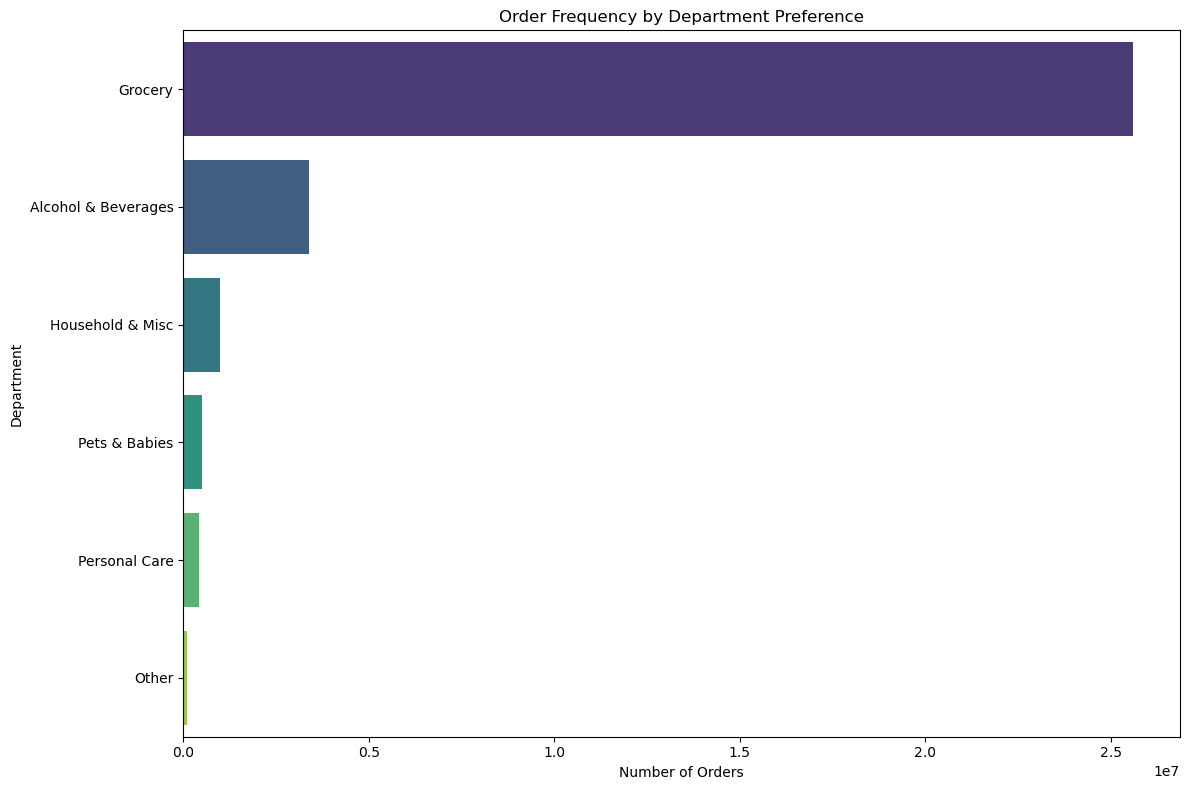

In [57]:
# Aggregate the total orders for each department
department_order_counts = df_filtered['department_preference'].value_counts().reset_index()
department_order_counts.columns = ['department_preference', 'order_count']

# Sort the data by order count for better visualization
department_order_counts = department_order_counts.sort_values(by='order_count', ascending=False)

# Define the directory to save the charts
directory = r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations"

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='order_count', y='department_preference', data=department_order_counts, palette='viridis')
plt.title('Order Frequency by Department Preference')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.tight_layout()

# Save the bar chart
bar_chart_path = os.path.join(directory, 'order_frequency_by_department_preference.png')
plt.savefig(bar_chart_path)
plt.show()

C:\Users\marci\AppData\Local\Temp\ipykernel_2248\2837135548.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_count', y='department', data=department_order_counts, palette='viridis')


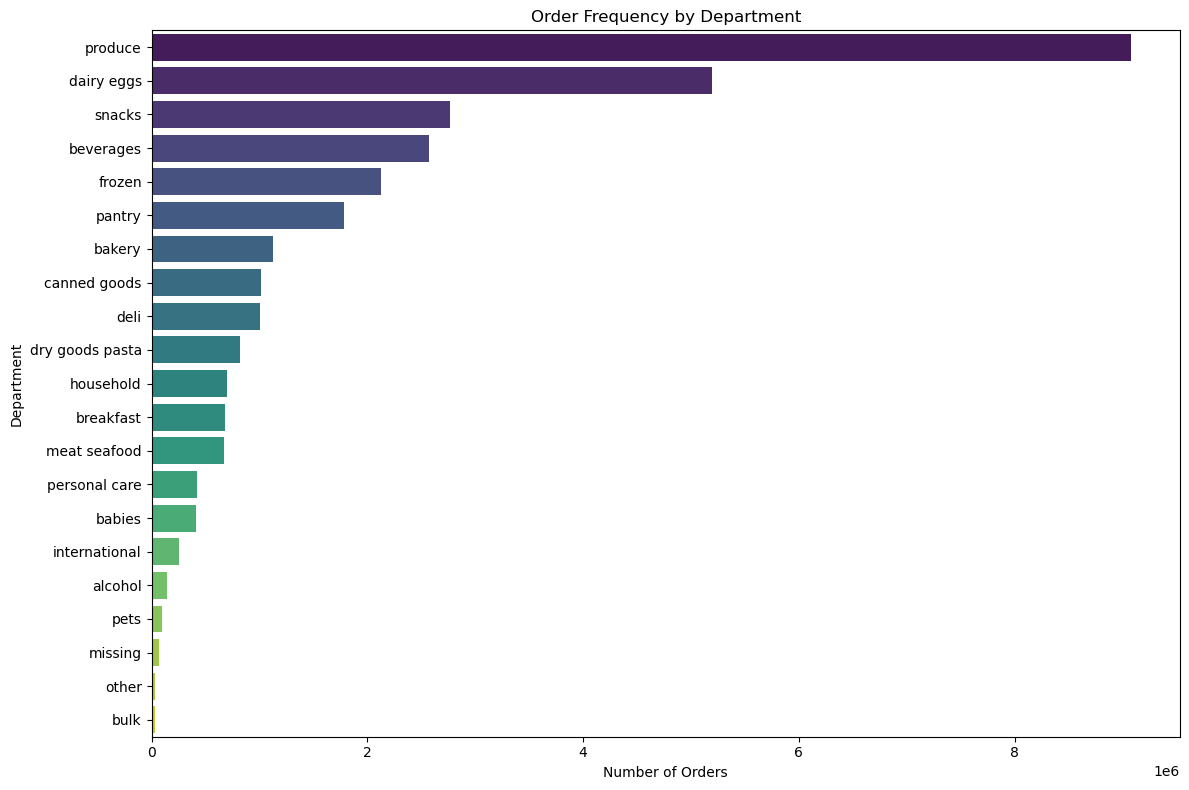

In [60]:
# Aggregate the total orders for each department
department_order_counts = df_filtered['department_id'].value_counts().reset_index()
department_order_counts.columns = ['department_id', 'order_count']

# Map department_id to department names for better readability
department_mapping = {
    1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol', 6: 'international',
    7: 'beverages', 8: 'pets', 9: 'dry goods pasta', 10: 'bulk', 11: 'personal care',
    12: 'meat seafood', 13: 'pantry', 14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs',
    17: 'household', 18: 'babies', 19: 'snacks', 20: 'deli', 21: 'missing'
}
department_order_counts['department'] = department_order_counts['department_id'].map(department_mapping)

# Sort the data by order count for better visualization
department_order_counts = department_order_counts.sort_values(by='order_count', ascending=False)

# Define the directory to save the charts
directory = r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations"

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='order_count', y='department', data=department_order_counts, palette='viridis')
plt.title('Order Frequency by Department')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.tight_layout()

# Save the bar chart
bar_chart_path = os.path.join(directory, 'order_frequency_by_department.png')
plt.savefig(bar_chart_path)
plt.show()

In [119]:
#  order time patterns
def time_profile(row):
    if row['order_dow'] < 5:
        if row['order_hour_of_day'] < 12:
            return 'Weekday morning shopper'
        else:
            return 'Weekday afternoon shopper'
    else:
        if row['order_hour_of_day'] < 12:
            return 'Weekend morning shopper'
        else:
            return 'Weekend afternoon shopper'

df_filtered['time_profile'] = df_filtered.apply(time_profile, axis=1)

In [121]:
df_filtered['time_profile'].value_counts(dropna=False)

time_profile
Weekday afternoon shopper    14571678
Weekday morning shopper       8087949
Weekend afternoon shopper     5410743
Weekend morning shopper       2921172
Name: count, dtype: int64

In [160]:
# Combine age,income and family profiles into a single profiling variable
df_filtered['customer_profile'] = (df_filtered['age_profile'] + ', ' + 
                                              df_filtered['income_segment'] + ', ' + 
                                              df_filtered['family_profile']  ) 
df_filtered['customer_profile_dept'] = (df_filtered['age_profile'] + ', ' + 
                                              df_filtered['income_segment'] + ', ' + 
                                              df_filtered['family_profile'] + ', ' + 
                                              df_filtered['department_preference'] ) 
df_filtered['customer_profile_reg'] = (df_filtered['age_profile'] + ', ' + 
                                              df_filtered['income_segment'] + ', ' + 
                                              df_filtered['family_profile'] + ', ' + 
                                              df_filtered['Region'] ) 
# Display the dataframe with the new profiling variable
print(df_filtered[['age_profile', 'income_segment', 'num_dependents', 'family_status', 'department_preference',  'customer_profile','customer_profile_dept', 'customer_profile_reg']]) 

         age_profile income_segment  num_dependents family_status  \
0              Adult     Low income               3       married   
1              Adult     Low income               3       married   
2              Adult     Low income               3       married   
3              Adult     Low income               3       married   
4              Adult     Low income               3       married   
...              ...            ...             ...           ...   
32433025      Senior    High income               3       married   
32433026      Senior    High income               3       married   
32433027      Senior    High income               3       married   
32433028      Senior    High income               3       married   
32433029      Senior    High income               3       married   

         department_preference                   customer_profile  \
0          Alcohol & Beverages    Adult, Low income, Large family   
1                      Grocery   

In [164]:
df_filtered['customer_profile'].value_counts(dropna=False)


customer_profile
Senior, High income, small family                   3525051
Mature Adult, High income, small family             2505777
Adult, Middle income, small family                  1987511
Senior, High income, Large family                   1789473
Senior, High income, Couple with no kids            1770179
Young Adult, Middle income, small family            1572476
Mature Adult, High income, Large family             1279742
Middle-aged Adult, Middle income, small family      1243640
Mature Adult, High income, Single adult             1211587
Senior, Middle income, small family                 1113901
Adult, Middle income, Single adult                   986562
Adult, Middle income, Large family                   982206
Middle-aged Adult, High income, small family         898656
Young Adult, Middle income, Large family             805567
Mature Adult, Middle income, small family            805469
Young Adult, Middle income, Single adult             764263
Middle-aged Adult, Midd

In [166]:
 df_filtered['customer_profile_dept'].value_counts(dropna=False)


customer_profile_dept
Senior, High income, small family, Grocery                      2915676
Mature Adult, High income, small family, Grocery                2069787
Adult, Middle income, small family, Grocery                     1655661
Senior, High income, Large family, Grocery                      1481627
Senior, High income, Couple with no kids, Grocery               1466201
                                                                 ...   
Mature Adult, Low income, Couple with no kids, Personal Care         98
Mature Adult, Middle income, Couple with no kids, Other              72
Young Adult, High income, Single adult, Other                        71
Mature Adult, Low income, Couple with no kids, Pets & Babies         69
Mature Adult, Low income, Couple with no kids, Other                 29
Name: count, Length: 288, dtype: int64

In [168]:
df_filtered['customer_profile_reg'].value_counts(dropna=False)

customer_profile_reg
Senior, High income, small family, South                    1175433
Senior, High income, small family, West                      892717
Senior, High income, small family, Midwest                   835430
Mature Adult, High income, small family, South               811400
Adult, Middle income, small family, South                    674342
                                                             ...   
Young Adult, High income, Single adult, Northeast              3051
Mature Adult, Low income, Couple with no kids, West            2978
Mature Adult, Low income, Couple with no kids, South           2524
Mature Adult, Low income, Couple with no kids, Midwest         1505
Mature Adult, Low income, Couple with no kids, Northeast        541
Name: count, Length: 192, dtype: int64

# STEP 6:  Visualizations

C:\Users\marci\AppData\Local\Temp\ipykernel_2248\2196496996.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  profiltop10=sns.barplot(x='count', y='customer_profile_dept', data=top_profiles, palette='viridis')


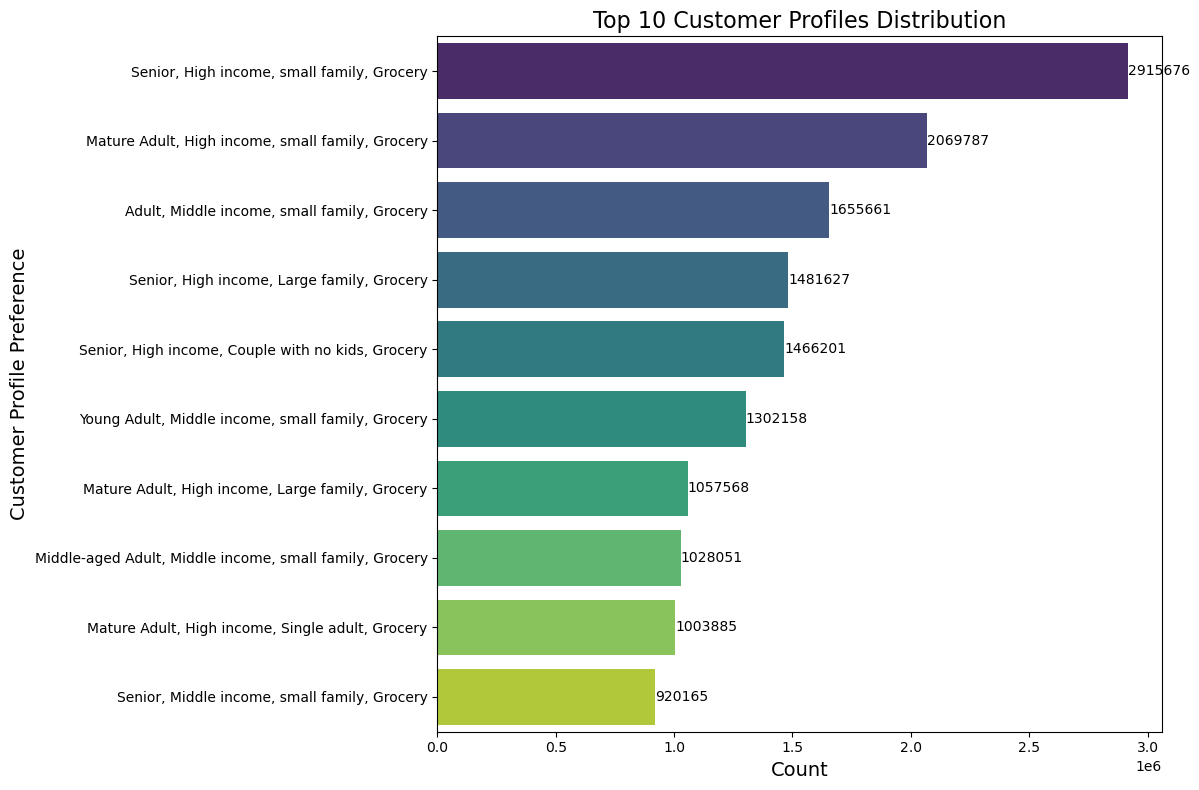

In [174]:
# Count the occurrences of each profile
profile_counts = df_filtered['customer_profile_dept'].value_counts().reset_index()
profile_counts.columns = ['customer_profile_dept', 'count']

# Get the top 10 profiles 
top_profiles = profile_counts.head(10)


# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot for the top N profiles
profiltop10=sns.barplot(x='count', y='customer_profile_dept', data=top_profiles, palette='viridis')

# Add data labels to each bar
for index, value in enumerate(top_profiles['count']):
    plt.text(value + 100, index, f'{value}', va='center', fontsize=10)

# Add titles and labels
plt.title('Top 10 Customer Profiles Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Customer Profile Preference', fontsize=14)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

In [176]:
# Exporting :
profiltop10.figure.savefig(os.path.join(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations\coustomerer_profil_depto.png"))

C:\Users\marci\AppData\Local\Temp\ipykernel_2248\4084944499.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  profilbottom10=sns.barplot(x='count', y='customer_profile_dept', data=top_profiles, palette='viridis')


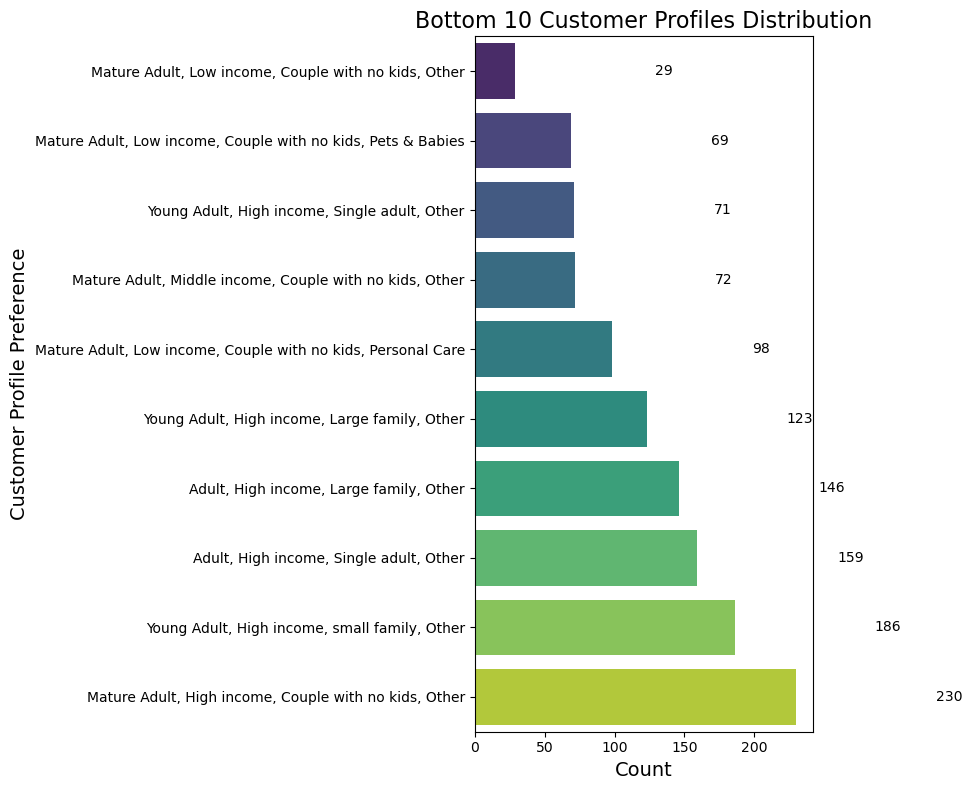

In [178]:
# Count the occurrences of each profile
profile_counts = df_filtered['customer_profile_dept'].value_counts().reset_index()
profile_counts.columns = ['customer_profile_dept', 'count']

# Get the bottom 10 profiles 
top_profiles = profile_counts.tail(10)

# Sort profiles by count (optional if needed)
top_profiles = top_profiles.sort_values('count', ascending=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot for the top N profiles
profilbottom10=sns.barplot(x='count', y='customer_profile_dept', data=top_profiles, palette='viridis')

# Add data labels to each bar
for index, value in enumerate(top_profiles['count']):
    plt.text(value + 100, index, f'{value}', va='center', fontsize=10)

# Add titles and labels
plt.title('Bottom 10 Customer Profiles Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Customer Profile Preference', fontsize=14)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

In [180]:
# Exporting :
profilbottom10.figure.savefig(os.path.join(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations\coustomerer_profil_deptobottom.png"))

# STEP 7: Aggregate the max, mean, and min variables on a customer-profile

In [345]:
# Aggregate max, mean, and min for usage frequency and expenditure
aggregated_data = df_filtered.groupby('customer_profile').agg({
    'usage_frequency': ['max', 'mean', 'min'],
    'expenditure': ['max', 'mean', 'min']
}).reset_index()

# Flatten the MultiIndex columns
aggregated_data.columns = ['_'.join(col).strip() if col[1] else col[0] for col in aggregated_data.columns.values]
aggregated_data.rename(columns={'customer_profile_': 'customer_profile'}, inplace=True)

# Display the aggregated data
print(aggregated_data)


                                    customer_profile  usage_frequency_max  \
0                   Adult, High income, Large family                 1290   
1                   Adult, High income, Single adult                 1164   
2                   Adult, High income, small family                 1145   
3                    Adult, Low income, Large family                 2463   
4                    Adult, Low income, Single adult                 1968   
5                    Adult, Low income, small family                 2445   
6                 Adult, Middle income, Large family                 2379   
7                 Adult, Middle income, Single adult                 2429   
8                 Adult, Middle income, small family                 2631   
9     Mature Adult, High income, Couple with no kids                 1805   
10           Mature Adult, High income, Large family                 2760   
11           Mature Adult, High income, Single adult                 2547   

# STEP 8:Compare  customer profiles with regions and departments

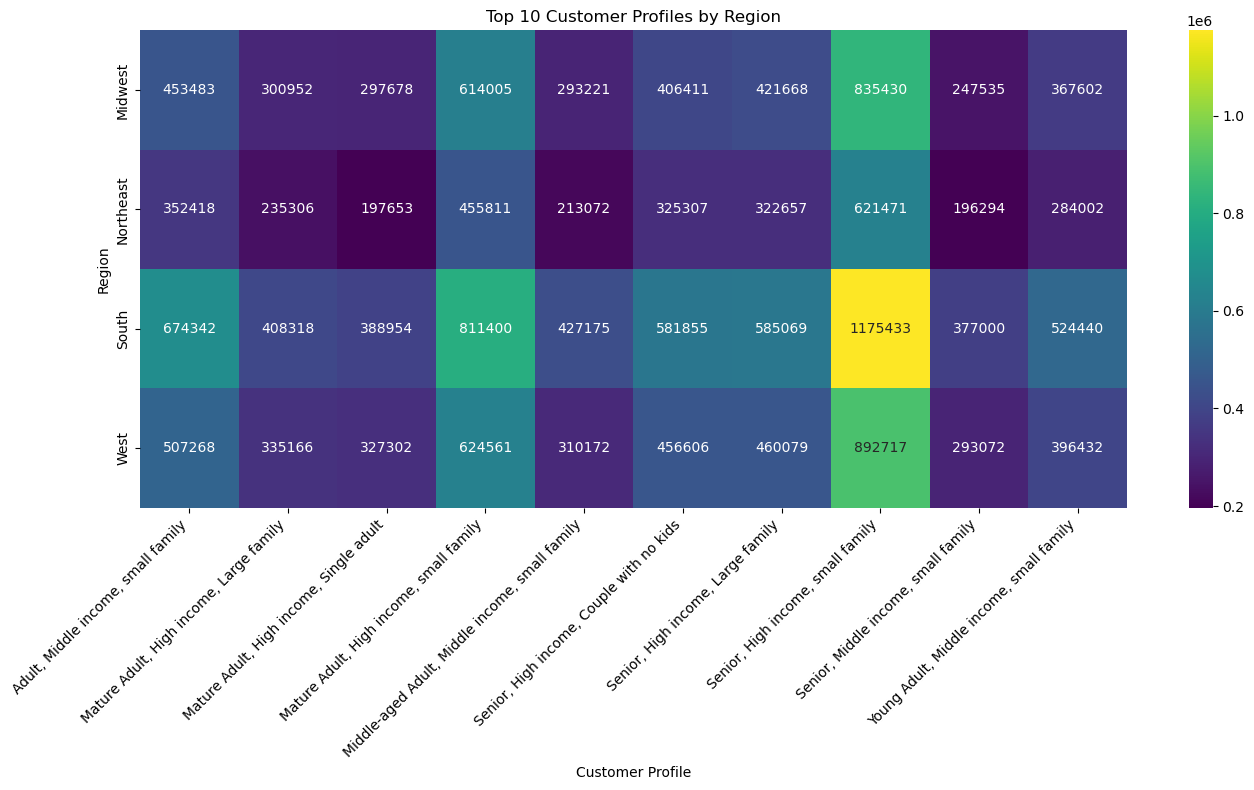

In [359]:
# Aggregate data to get the count of customer profiles within each region
profile_region_counts = df_filtered.groupby(['Region', 'customer_profile']).size().reset_index(name='count')

# Select top 10 customer profiles based on total count
top_profiles = profile_region_counts.groupby('customer_profile')['count'].sum().nlargest(10).index
filtered_counts = profile_region_counts[profile_region_counts['customer_profile'].isin(top_profiles)]

# Pivot the table to get a matrix for the heatmap
profile_region_pivot = filtered_counts.pivot(index='Region', columns='customer_profile', values='count')

# Define the directory to save the charts
directory = r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations"

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(profile_region_pivot, annot=True, fmt='d', cmap='viridis')
plt.title('Top 10 Customer Profiles by Region')
plt.xlabel('Customer Profile')
plt.ylabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the heatmap
heatmap_path = os.path.join(directory, 'top_10_customer_profiles_by_region_heatmap.png')
plt.savefig(heatmap_path)
plt.show()

C:\Users\marci\AppData\Local\Temp\ipykernel_2248\2682096836.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  profilregtop10=sns.barplot(x='count', y='customer_profile_reg', data=top_profiles, palette='viridis')


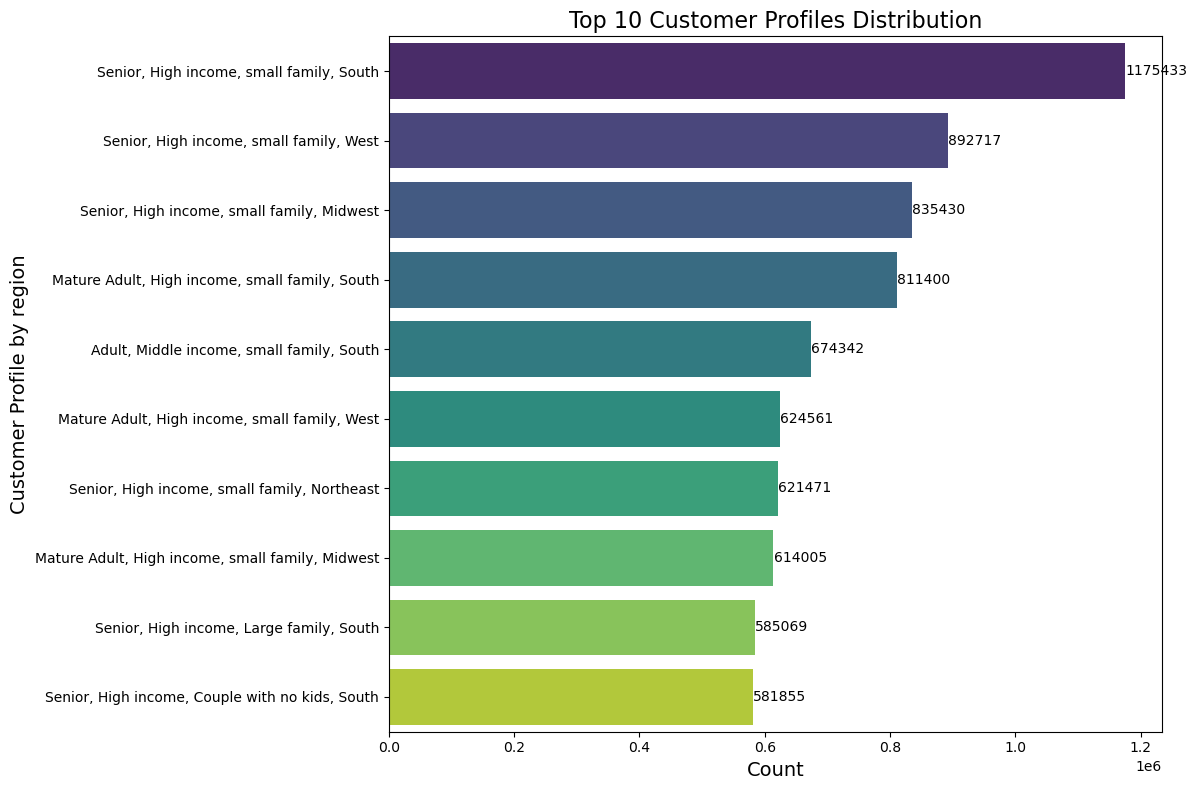

In [189]:
# # Count the occurrences of each profile
profile_counts = df_filtered['customer_profile_reg'].value_counts().reset_index()
profile_counts.columns = ['customer_profile_reg', 'count']

# Get the top 10 profiles 
top_profiles = profile_counts.head(10)


# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot for the top N profiles
profilregtop10=sns.barplot(x='count', y='customer_profile_reg', data=top_profiles, palette='viridis')

# Add data labels to each bar
for index, value in enumerate(top_profiles['count']):
    plt.text(value + 100, index, f'{value}', va='center', fontsize=10)

# Add titles and labels
plt.title('Top 10 Customer Profiles Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Customer Profile by region', fontsize=14)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

In [191]:
# Exporting :
profilregtop10.figure.savefig(os.path.join(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations\coustomerer_profil_regtop.png"))

C:\Users\marci\AppData\Local\Temp\ipykernel_2248\3018113283.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  profilregbotttom10=sns.barplot(x='count', y='customer_profile_reg', data=top_profiles, palette='viridis')


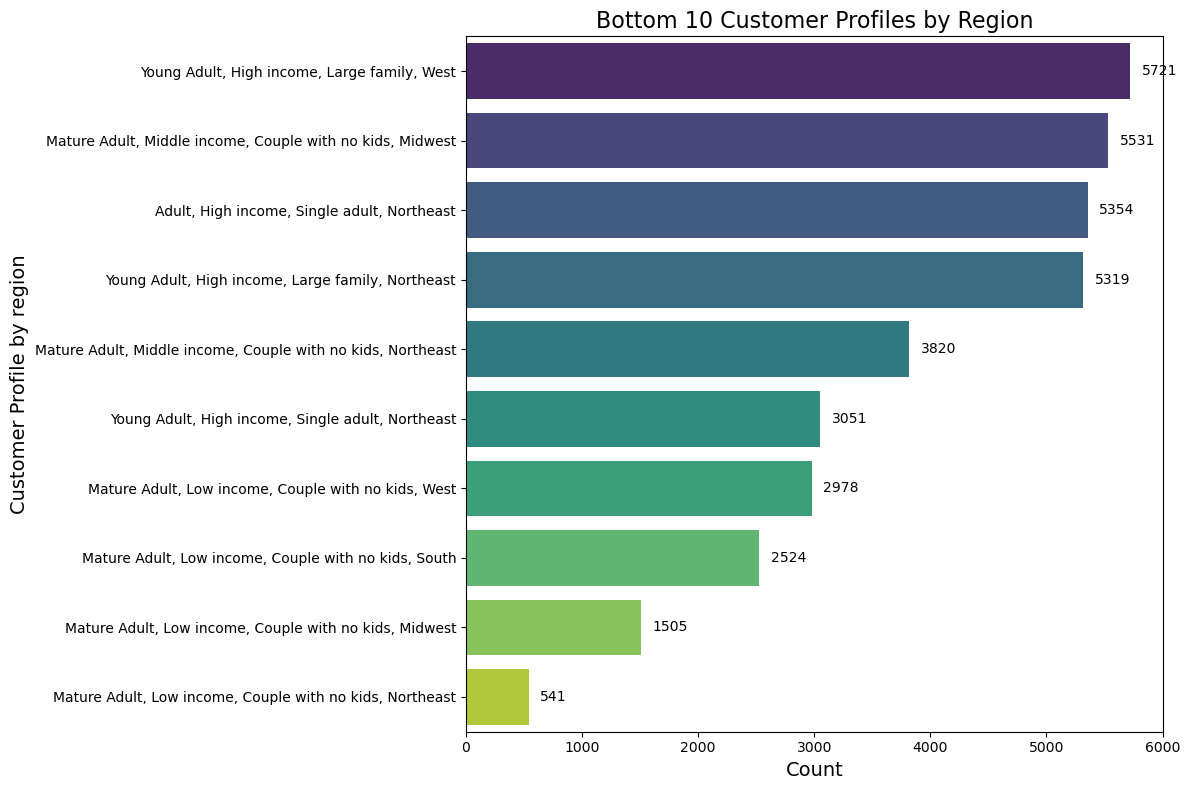

In [195]:
#Count the occurrences of each profile
profile_counts = df_filtered['customer_profile_reg'].value_counts().reset_index()
profile_counts.columns = ['customer_profile_reg', 'count']

# Sort profiles by count (optional if needed)
top_profiles = top_profiles.sort_values('count', ascending=True)

# Get the top 10 profiles 
top_profiles = profile_counts.tail(10)


# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot for the top N profiles
profilregbotttom10=sns.barplot(x='count', y='customer_profile_reg', data=top_profiles, palette='viridis')

# Add data labels to each bar
for index, value in enumerate(top_profiles['count']):
    plt.text(value + 100, index, f'{value}', va='center', fontsize=10)

# Add titles and labels
plt.title('Bottom 10 Customer Profiles by Region', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Customer Profile by region', fontsize=14)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

In [198]:
# # Exporting :
profilregbotttom10.figure.savefig(os.path.join(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations\coustomerer_profil_regbotttom10.png"))

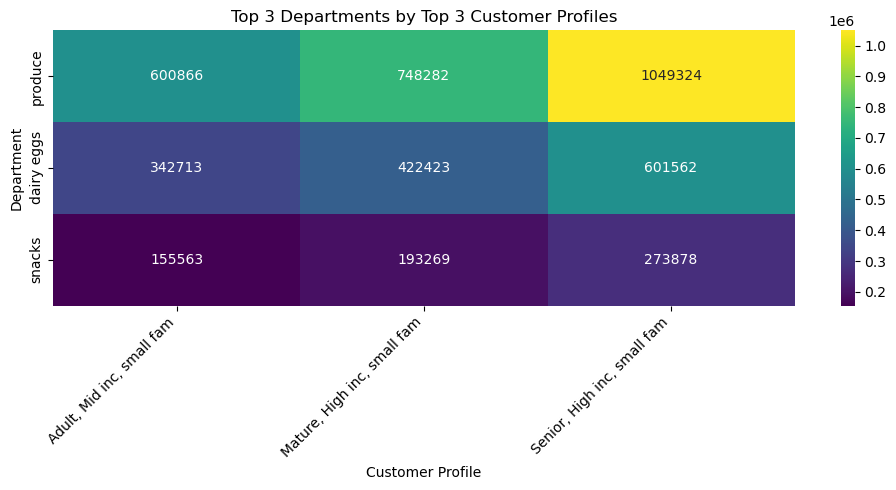

In [365]:
# Simplified labels for customer profiles
customer_profile_mapping = {
    'Adult, Middle income, small family': 'Adult, Mid inc, small fam',
    'Mature Adult, High income, small family': 'Mature, High inc, small fam',
    'Senior, High income, Couple with no kids': 'Senior, High inc, no kids',
    'Senior, High income, Large family': 'Senior, High inc, large fam',
    'Senior, High income, small family': 'Senior, High inc, small fam'
}

# Filter the original data to include only the top 3 departments and profiles
top_departments = profile_department_counts.groupby('department_id')['count'].sum().nlargest(3).index
filtered_department_counts = profile_department_counts[profile_department_counts['department_id'].isin(top_departments)]

top_profiles = profile_department_counts.groupby('customer_profile')['count'].sum().nlargest(3).index
filtered_department_counts = filtered_department_counts[filtered_department_counts['customer_profile'].isin(top_profiles)]

# Pivot the table to get a matrix for the heatmap
profile_department_pivot = filtered_department_counts.pivot(index='department_id', columns='customer_profile', values='count')

# Map department_id to department names for better readability
department_mapping = {
    1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol', 6: 'international',
    7: 'beverages', 8: 'pets', 9: 'dry goods pasta', 10: 'bulk', 11: 'personal care',
    12: 'meat seafood', 13: 'pantry', 14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs',
    17: 'household', 18: 'babies', 19: 'snacks', 20: 'deli', 21: 'missing'
}
profile_department_pivot.rename(index=department_mapping, inplace=True)
profile_department_pivot.rename(columns=customer_profile_mapping, inplace=True)

# Define the directory to save the charts
directory = r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations"

# Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(profile_department_pivot, annot=True, fmt='d', cmap='viridis')
plt.title('Top 3 Departments by Top 3 Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the heatmap
heatmap_path = os.path.join(directory, 'top_3_departments_by_top_3_customer_profiles_heatmap.png')
plt.savefig(heatmap_path)
plt.show()

# Additional Information

In [70]:
# Define the price ranges
def categorize_price(prices):
    if prices < 5:
        return 'Low'
    elif 5 <= prices < 10:
        return 'Medium'
    elif 10 <= prices < 20:
        return 'High'
    else:
        return 'Premium'

# Apply the function to create a new column
df_filtered['price_range'] = df_filtered['prices'].apply(categorize_price)

# Analyze the distribution of products within these price ranges
price_range_distribution = df_filtered['price_range'].value_counts().reset_index()
price_range_distribution.columns = ['Price Range', 'Number of Products']



In [72]:
df_filtered['price_range'].value_counts(dropna=False)

price_range
Medium     11342851
High        9967334
Low         9459086
Premium      222271
Name: count, dtype: int64

C:\Users\marci\AppData\Local\Temp\ipykernel_2248\2214151286.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price Range', y='Number of Products', data=price_range_distribution, palette='viridis')


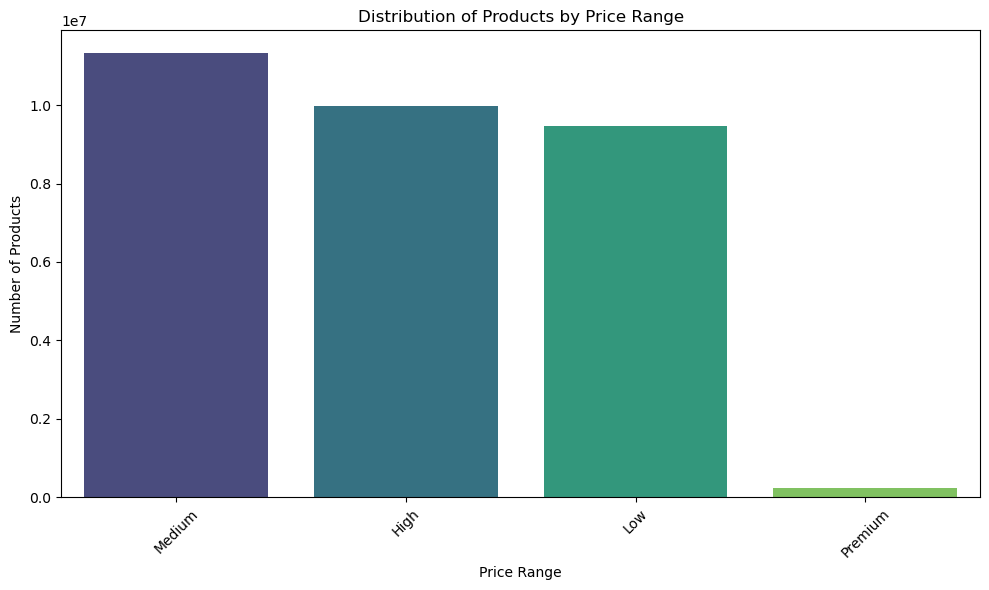

  Price Range  Number of Products
0      Medium            11342851
1        High             9967334
2         Low             9459086
3     Premium              222271


In [74]:
# Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Price Range', y='Number of Products', data=price_range_distribution, palette='viridis')
plt.title('Distribution of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations\price_range_distribution.png")
plt.show()

# Print the distribution for review
print(price_range_distribution)

C:\Users\marci\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


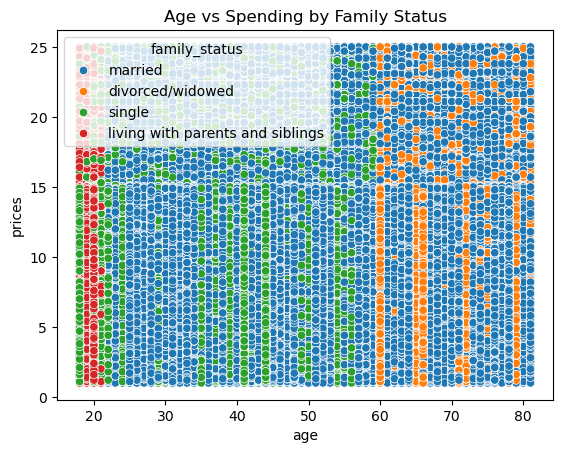

family_status      divorced/widowed  living with parents and siblings  \
age_profile                                                             
Adult                             0                                 0   
Mature Adult                 112220                                 0   
Middle-aged Adult                 0                                 0   
Senior                      2535441                                 0   
Young Adult                       0                           1482575   

family_status      married   single  
age_profile                          
Adult              3652873  1225570  
Mature Adult       5468799  1710576  
Middle-aged Adult  3623371  1208832  
Senior             7585841        0  
Young Adult        1431386   954058  


In [97]:
# Scatter plot for Age vs Spending by Family Status
sns.scatterplot(x='age', y='prices', hue='family_status', data=df_filtered)
plt.title('Age vs Spending by Family Status')
plt.show()

# Cross-tab analysis
age_family_crosstab = pd.crosstab(df_filtered['age_profile'], df_filtered['family_status'])
print(age_family_crosstab)

In [101]:
plt.savefig(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations\age_family_crosstab.png")

<Figure size 640x480 with 0 Axes>

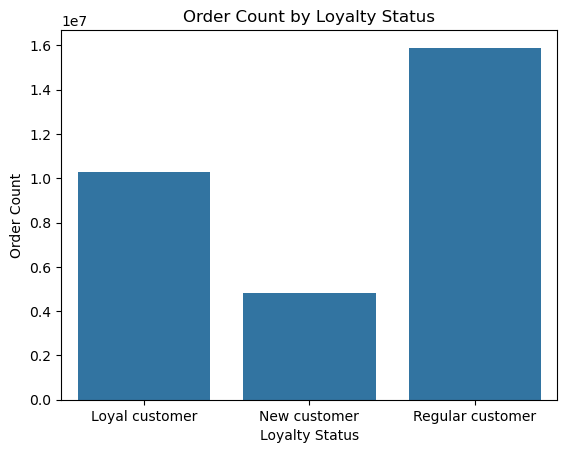

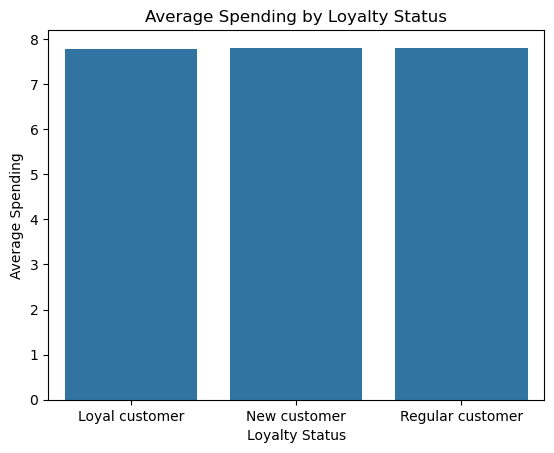

In [105]:
# Group by loyalty flag and calculate metrics
loyalty_analysis = df_filtered.groupby('loyalty_flag').agg({
    'order_id': 'count',
    'prices': ['mean', 'sum'],
    'product_id': pd.Series.nunique
}).reset_index()

# Rename columns for clarity
loyalty_analysis.columns = ['Loyalty Status', 'Order Count', 'Average Spending', 'Total Spending', 'Unique Products Ordered']

# Visualization
sns.barplot(x='Loyalty Status', y='Order Count', data=loyalty_analysis)
plt.title('Order Count by Loyalty Status')
plt.show()

sns.barplot(x='Loyalty Status', y='Average Spending', data=loyalty_analysis)
plt.title('Average Spending by Loyalty Status')
plt.show()

<Figure size 1400x800 with 0 Axes>

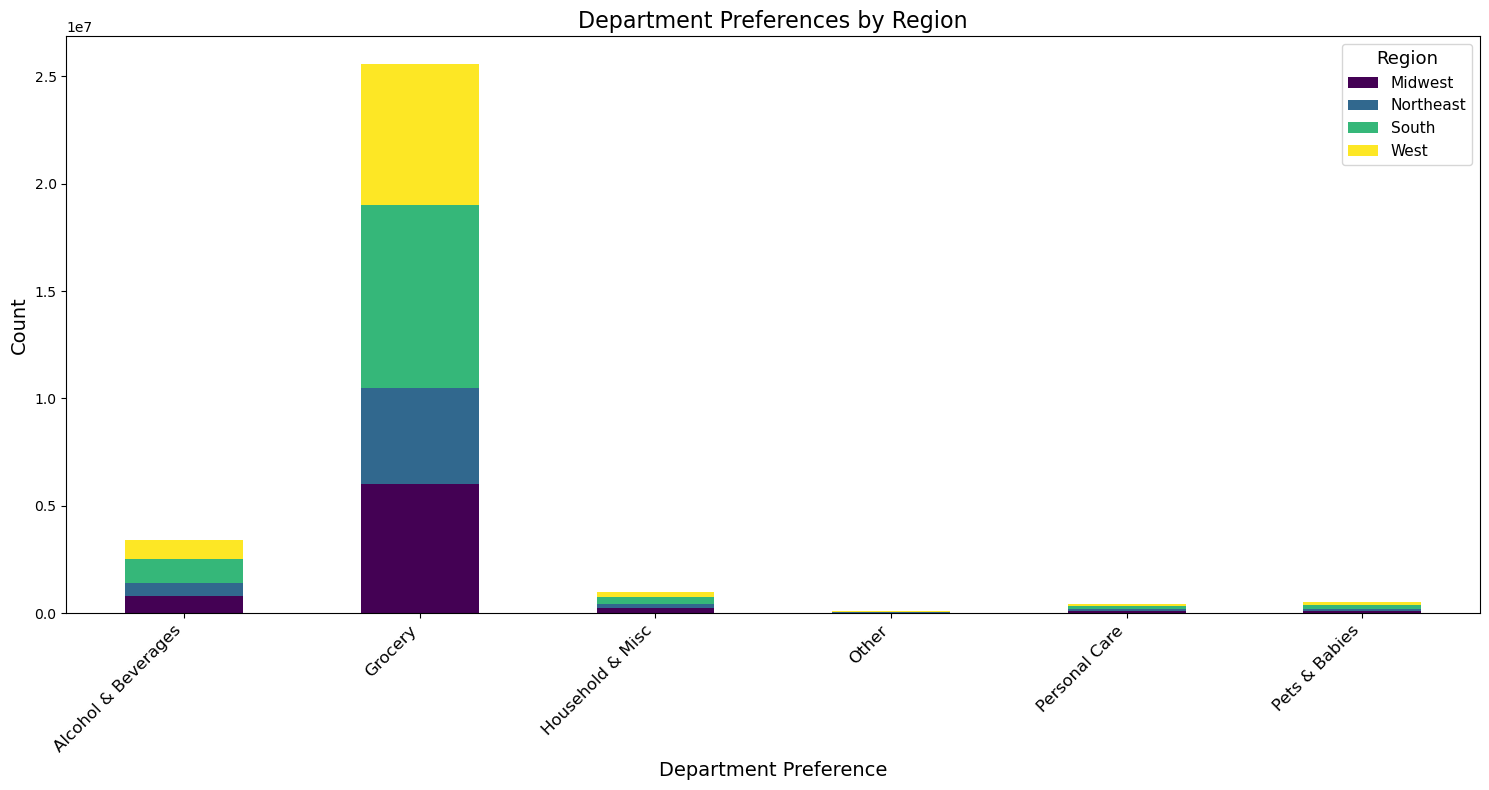

In [202]:
# Group by department_preference and Region, then count the occurrences
dept_region_counts = df_filtered.groupby(['department_preference', 'Region']).size().reset_index(name='count')

# Pivot the table to have regions as columns and department preferences as rows
dept_region_pivot = dept_region_counts.pivot(index='department_preference', columns='Region', values='count')

# Plot the data
Dept_Reg=plt.figure(figsize=(14, 8))
dept_region_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 8))

# Add titles and labels
plt.title('Department Preferences by Region', fontsize=16)
plt.xlabel('Department Preference', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Region', title_fontsize='13', fontsize='11')

# Show the plot
plt.tight_layout()
plt.show()

In [204]:
# # Exporting :
Dept_Reg.figure.savefig(os.path.join(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations\Dept_Reg.png"))